Загружаем нужные нам модули:    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from math import sqrt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

Загружаем тренировочные данные:     

In [2]:
train = pd.read_csv('dataset/train.csv')

In [3]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [5]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

Выведем размерность тренировочной выборки:

In [6]:
print('Размерность тренировочной выборки', train.shape)

Размерность тренировочной выборки (10000, 20)


In [7]:
train.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

### Обработаем тренировочные данные:

Признаки Ecology_2, Ecology_3, Shops_2 с типом object преобразуем в дамми-переменные:

In [8]:
train = pd.get_dummies(train)

In [9]:
train.mean()

Id                 8383.407700
DistrictId           50.400800
Rooms                 1.890500
Square               56.315775
LifeSquare           37.199645
KitchenSquare         6.273300
Floor                 8.526700
HouseFloor           12.609400
HouseYear          3990.166300
Ecology_1             0.118858
Social_1             24.687000
Social_2           5352.157400
Social_3              8.039200
Healthcare_1       1142.904460
Helthcare_2           1.319500
Shops_1               4.231300
Price            214138.857399
Ecology_2_A           0.009700
Ecology_2_B           0.990300
Ecology_3_A           0.027500
Ecology_3_B           0.972500
Shops_2_A             0.082500
Shops_2_B             0.917500
dtype: float64

In [10]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,...,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,...,1142.904460,1.319500,4.231300,214138.857399,0.009700,0.990300,0.027500,0.972500,0.082500,0.917500
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,...,1021.517264,1.493601,4.806341,92872.293865,0.098015,0.098015,0.163543,0.163543,0.275139,0.275139
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,...,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,...,350.000000,0.000000,1.000000,153872.633942,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,...,900.000000,1.000000,3.000000,192269.644879,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,...,1548.000000,2.000000,6.000000,249135.462171,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,...,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Есть явные ошибки в HouseYear, год постройки не может быть больше 2020, заменим на train['HouseYear'].median().

In [11]:
train.loc[train['HouseYear'] > 2020, 'HouseYear'] = train['HouseYear'].median()

Дозаполним недостающие параметры, например Healthcare_1 заполним средним значением:

In [12]:
train['Healthcare_1'] = train['Healthcare_1'].fillna(train['Healthcare_1'].mean())

Этаж квартиры не может быть больше чем количество этажей в доме:

In [13]:
train.loc[train['HouseFloor'] < train['Floor'], 'Floor'] = train['HouseFloor']

В квартире не может быть 0 комнат:

In [14]:
train.loc[train['Rooms'] == 0, 'Rooms'] = train['Rooms'].median()

Мы видим что есть квартира с максимальным количеством комнат 19, это очень большое значение, если количество комнат больше 8, то заменим медианой train['Rooms'].median() :

In [15]:
train.loc[train['Rooms'] > 8, 'Rooms'] = train['Rooms'].median()

Мы видим что есть квартира с кухней 2014 м2, это очень большое значение, откорректируем его, площадь кухни должна быть меньше жилой площади и общей площади :

In [16]:
train.loc[train['KitchenSquare'] > 25, 'KitchenSquare'] = train['KitchenSquare'].mean()

Жилая площадь должна быть меньше общей площади квартиры:

In [17]:
train.loc[train['LifeSquare'] > train['Square'], 'LifeSquare'] = train['Square']

Откорректируем записи где слишком маленькая площадь и жилая площадь квартиры:

In [18]:
train.loc[train['LifeSquare'] < 20, 'LifeSquare'] = train['LifeSquare'].mean()
train.loc[train['Square'] < 20, 'Square'] = train['Square'].mean()

Заполним жилую площадь LifeSquare где нет значений, от общей площади отнимем 15% и площадь кухни

In [19]:
train['LifeSquare'] = train['LifeSquare'].fillna(train['Square'] * 0.85 - train['KitchenSquare'])

In [20]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.888800,56.414014,40.936416,5.688621,7.70040,12.609400,1984.863800,0.118858,...,1142.904460,1.319500,4.231300,214138.857399,0.009700,0.990300,0.027500,0.972500,0.082500,0.917500
std,4859.01902,43.587592,0.812096,20.946702,18.670377,3.901509,5.30406,6.775974,18.409979,0.119025,...,736.734238,1.493601,4.806341,92872.293865,0.098015,0.098015,0.163543,0.163543,0.275139,0.275139
min,0.00000,0.000000,1.000000,20.213128,19.075924,0.000000,0.00000,0.000000,1910.000000,0.000000,...,0.000000,0.000000,0.000000,59174.778028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.811910,30.621410,1.000000,4.00000,9.000000,1974.000000,0.017647,...,830.000000,0.000000,1.000000,153872.633942,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.644105,36.048753,6.000000,7.00000,13.000000,1977.000000,0.075424,...,1142.904460,1.000000,3.000000,192269.644879,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12592.50000,75.000000,2.000000,65.900625,47.894827,9.000000,11.00000,17.000000,2001.000000,0.195781,...,1142.904460,2.000000,6.000000,249135.462171,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16798.00000,209.000000,6.000000,641.065193,638.163193,25.000000,42.00000,117.000000,2020.000000,0.521867,...,4849.000000,6.000000,23.000000,633233.466570,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Проверим нет ли пустых значений:

In [21]:
train.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Price            0
Ecology_2_A      0
Ecology_2_B      0
Ecology_3_A      0
Ecology_3_B      0
Shops_2_A        0
Shops_2_B        0
dtype: int64

In [22]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,...,1142.90446,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,...,240.00000,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8.0,12.0,1968.0,0.049637,...,229.00000,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,...,1084.00000,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,...,2078.00000,2,4,150226.531644,0,1,0,1,0,1


### Отбор признаков

In [23]:
train.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Price',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'Shops_2_A',
 'Shops_2_B']

In [24]:
feature_names = ['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B',
 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']

target_name = 'Price'

In [25]:
train = train[feature_names + [target_name]]
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969.0,0.089040,...,1142.90446,0,11,0,1,0,1,0,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978.0,0.000070,...,240.00000,1,16,0,1,0,1,0,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8.0,12.0,1968.0,0.049637,...,229.00000,1,3,0,1,0,1,0,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977.0,0.437885,...,1084.00000,0,5,0,1,0,1,0,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976.0,0.012339,...,2078.00000,2,4,0,1,0,1,0,1,150226.531644


### Стандартизация признаков

In [26]:
train.mean()

Id                 8383.407700
DistrictId           50.400800
Rooms                 1.888800
Square               56.414014
LifeSquare           40.936416
KitchenSquare         5.688621
Floor                 7.700400
HouseFloor           12.609400
HouseYear          1984.863800
Ecology_1             0.118858
Social_1             24.687000
Social_2           5352.157400
Social_3              8.039200
Healthcare_1       1142.904460
Helthcare_2           1.319500
Shops_1               4.231300
Ecology_2_A           0.009700
Ecology_2_B           0.990300
Ecology_3_A           0.027500
Ecology_3_B           0.972500
Shops_2_A             0.082500
Shops_2_B             0.917500
Price            214138.857399
dtype: float64

In [27]:
feature_names_for_stand = train[feature_names].select_dtypes(include='float64').columns.tolist()
feature_names_for_stand

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Healthcare_1']

In [28]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(train[feature_names_for_stand])

In [29]:
train[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [30]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Price
0,14038,35,0.136936,-0.402587,-0.615641,0.079814,-0.132056,-0.532703,-0.861739,-0.250529,...,0.000000,0,11,0,1,0,1,0,1,184966.930730
1,15053,41,1.368379,0.442556,-0.047504,0.592462,-0.132056,-0.532703,-0.372849,-0.998053,...,-1.225611,1,16,0,1,0,1,0,1,300009.450063
2,4765,53,0.136936,-0.547420,-0.628771,-1.458129,0.056488,-0.089940,-0.916060,-0.581588,...,-1.240543,1,3,0,1,0,1,0,1,220925.908524
3,5809,58,0.136936,-0.146142,0.631786,0.848786,0.056488,0.647998,-0.427170,2.680470,...,-0.079957,0,5,0,1,0,1,0,1,175616.227217
4,10783,99,-1.094506,-0.800396,-0.919162,0.336138,0.622121,-0.089940,-0.481491,-0.894969,...,1.269308,2,4,0,1,0,1,0,1,150226.531644


In [31]:
train.mean()

Id               8.383408e+03
DistrictId       5.040080e+01
Rooms           -1.526779e-16
Square          -2.368439e-16
LifeSquare      -9.876544e-17
KitchenSquare   -2.954748e-16
Floor           -6.330769e-17
HouseFloor       1.001077e-15
HouseYear       -4.696743e-15
Ecology_1        5.593304e-17
Social_1         2.468700e+01
Social_2         5.352157e+03
Social_3         8.039200e+00
Healthcare_1     9.305889e-17
Helthcare_2      1.319500e+00
Shops_1          4.231300e+00
Ecology_2_A      9.700000e-03
Ecology_2_B      9.903000e-01
Ecology_3_A      2.750000e-02
Ecology_3_B      9.725000e-01
Shops_2_A        8.250000e-02
Shops_2_B        9.175000e-01
Price            2.141389e+05
dtype: float64

In [32]:
train.std()

Id                4859.019020
DistrictId          43.587592
Rooms                1.000050
Square               1.000050
LifeSquare           1.000050
KitchenSquare        1.000050
Floor                1.000050
HouseFloor           1.000050
HouseYear            1.000050
Ecology_1            1.000050
Social_1            17.532614
Social_2          4006.799803
Social_3            23.831875
Healthcare_1         1.000050
Helthcare_2          1.493601
Shops_1              4.806341
Ecology_2_A          0.098015
Ecology_2_B          0.098015
Ecology_3_A          0.163543
Ecology_3_B          0.163543
Shops_2_A            0.275139
Shops_2_B            0.275139
Price            92872.293865
dtype: float64

### Построим и обучим несколько моделей и выберем лучшую.

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = train[feature_names]
y = train[target_name]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=21)

In [36]:
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(sqrt(mse(true_values, pred_values)), 3)))
    
    plt.figure(figsize=(6,6))
    
    sns.scatterplot(x=pred_values, y=true_values)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()
    return None

### Linear Regression - Линейная регрессия

Чтобы обучить модель, мы используем метод .fit, в который передаём нашу тренировочную выборку:

In [37]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Получим предсказанные значения на объектах X_test с помощью метода .predict

R2:	0.508
MAE:	44151.038
MSE:	4210171763.243
RMSE:	64885.836


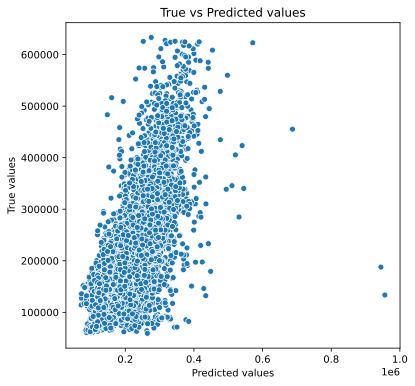

In [38]:
y_train_preds = lr_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

Получим предсказанные значения на объектах X_test с помощью метода .predict

R2:	0.498
MAE:	45371.373
MSE:	4463063102.369
RMSE:	66806.161


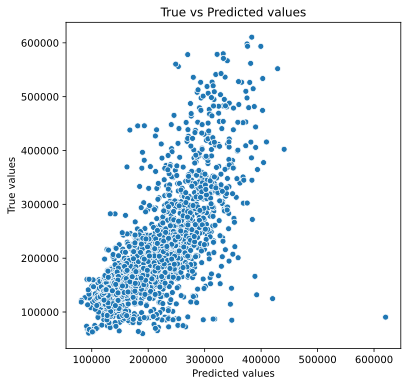

In [39]:
y_test_preds = lr_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

### Random Forest - Случайный лес

Чтобы обучить модель, мы используем метод .fit, в который передаём нашу тренировочную выборку:

In [40]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

Получим предсказанные значения на объектах X_train с помощью метода .predict

R2:	0.961
MAE:	10665.69
MSE:	330373727.023
RMSE:	18176.186


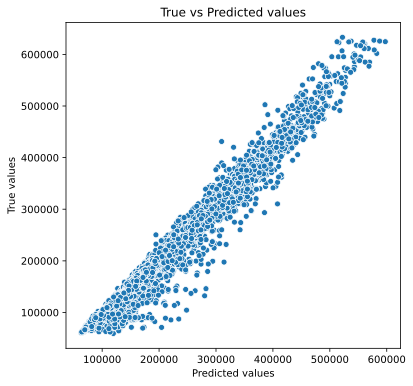

In [42]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

Получим предсказанные значения на объектах X_test с помощью метода .predict

R2:	0.745
MAE:	28038.504
MSE:	2271656861.588
RMSE:	47661.902


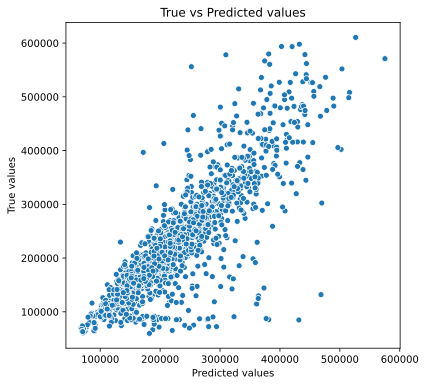

In [43]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

#### Модель Random Forest работает лучше чем модель Linear Regression линейной регрессии.
#### Далее будем использовать модель Random Forest.

### Загружаем наши тестовые test данные и предварительно их обрабатываем, как обрабатывали тренировочные train данные

In [44]:
test = pd.read_csv('dataset/test.csv')

In [45]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [47]:
print('Размерность тестовой выборки', test.shape)

Размерность тестовой выборки (5000, 19)


In [48]:
test = pd.get_dummies(test)

In [49]:
test.mean()

Id               8412.595400
DistrictId         51.279200
Rooms               1.910000
Square             56.449500
LifeSquare         36.158810
KitchenSquare       5.976800
Floor               8.632000
HouseFloor         12.601000
HouseYear        1984.392600
Ecology_1           0.119874
Social_1           24.933800
Social_2         5406.900000
Social_3            8.262600
Healthcare_1     1146.657263
Helthcare_2         1.319400
Shops_1             4.242800
Ecology_2_A         0.009600
Ecology_2_B         0.990400
Ecology_3_A         0.029800
Ecology_3_B         0.970200
Shops_2_A           0.082400
Shops_2_B           0.917600
dtype: float64

In [50]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,...,8.262600,1146.657263,1.31940,4.242800,0.009600,0.990400,0.029800,0.970200,0.082400,0.917600
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,...,23.863762,1044.744231,1.47994,4.777365,0.097518,0.097518,0.170052,0.170052,0.275001,0.275001
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,...,0.000000,325.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,...,2.000000,900.000000,1.00000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,...,5.000000,1548.000000,2.00000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,...,141.000000,4849.000000,6.00000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
test.loc[train['HouseYear'] > 2020, 'HouseYear'] = test['HouseYear'].median()
test['Healthcare_1'] = test['Healthcare_1'].fillna(test['Healthcare_1'].mean())
test.loc[test['HouseFloor'] < test['Floor'], 'Floor'] = test['HouseFloor']
test.loc[test['Rooms'] == 0, 'Rooms'] = test['Rooms'].median()
test.loc[test['Rooms'] > 8, 'Rooms'] = test['Rooms'].median()
test.loc[test['KitchenSquare'] > 25, 'KitchenSquare'] = test['KitchenSquare'].mean()
test.loc[test['LifeSquare'] > test['Square'], 'LifeSquare'] = test['Square']
test.loc[test['LifeSquare'] < 20, 'LifeSquare'] = test['LifeSquare'].mean()
test.loc[test['Square'] < 20, 'Square'] = test['Square'].mean()
test['LifeSquare'] = test['LifeSquare'].fillna(test['Square'] * 0.85 - test['KitchenSquare'])

In [52]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.90780,56.590080,40.778446,5.700721,7.838000,12.601000,1984.392600,0.119874,...,8.262600,1146.657263,1.31940,4.242800,0.009600,0.990400,0.029800,0.970200,0.082400,0.917600
std,4832.674037,44.179466,0.81008,18.915143,16.152477,3.821277,5.454989,6.789213,18.573149,0.120070,...,23.863762,756.632091,1.47994,4.777365,0.097518,0.097518,0.170052,0.170052,0.275001,0.275001
min,1.000000,0.000000,1.00000,20.011215,20.004328,0.000000,0.000000,0.000000,1908.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4221.750000,21.000000,1.00000,41.977760,30.616082,1.000000,4.000000,9.000000,1973.000000,0.019509,...,0.000000,810.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,8320.500000,37.000000,2.00000,53.126919,35.979822,6.000000,7.000000,12.000000,1977.000000,0.072158,...,2.000000,1146.657263,1.00000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,12598.250000,77.000000,2.00000,66.285129,48.101606,9.000000,11.000000,17.000000,2000.000000,0.195781,...,5.000000,1146.657263,2.00000,6.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,16795.000000,212.000000,6.00000,223.453689,168.729035,24.000000,46.000000,99.000000,2020.000000,0.521867,...,141.000000,4849.000000,6.00000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Проверим нет ли пустых значений в тестовых данных:

In [53]:
test.isnull().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Ecology_2_A      0
Ecology_2_B      0
Ecology_3_A      0
Ecology_3_B      0
Shops_2_A        0
Shops_2_B        0
dtype: int64

In [58]:
print('Размерность тестовых данных:', test.shape)

Размерность тестовых данных: (5000, 22)


### Стандартизация признаков

In [59]:
scaler = StandardScaler()
stand_features = scaler.transform(test[feature_names_for_stand])
test[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [544]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,0.113827,-0.354642,-0.454816,0.078327,-0.336973,0.206083,-0.667060,1.585280,...,1,-1.108447e-16,0,0,0,1,0,1,0,1
1,15856,74,0.113827,0.670065,1.058474,-1.230267,-1.253657,-1.708911,-0.397759,-0.367283,...,3,-1.108447e-16,0,2,0,1,0,1,0,1
2,5480,190,-1.120741,-0.007433,-0.297113,1.648640,-1.070320,-1.119682,-4.060261,-0.998468,...,87,4.699376e+00,5,5,0,1,0,1,0,1
3,15664,47,0.113827,0.870106,0.691133,0.863483,2.596415,1.384540,1.218051,-0.149940,...,3,-1.108447e-16,3,3,0,1,0,1,0,1
4,14275,27,-1.120741,-0.479186,0.161547,-1.230267,1.679731,0.648004,1.756655,-0.397445,...,1,-1.108447e-16,0,0,0,1,0,1,1,0


In [540]:
test.mean()

Id               8.412595e+03
DistrictId       5.127920e+01
Rooms            1.720790e-16
Square           1.970646e-18
LifeSquare      -4.440892e-20
KitchenSquare   -2.545963e-16
Floor            7.260859e-17
HouseFloor       1.074474e-16
HouseYear       -1.445066e-16
Ecology_1        9.781065e-17
Social_1         2.493380e+01
Social_2         5.406900e+03
Social_3         8.262600e+00
Healthcare_1     2.246536e-17
Helthcare_2      1.319400e+00
Shops_1          4.242800e+00
Ecology_2_A      9.600000e-03
Ecology_2_B      9.904000e-01
Ecology_3_A      2.980000e-02
Ecology_3_B      9.702000e-01
Shops_2_A        8.240000e-02
Shops_2_B        9.176000e-01
dtype: float64

Проводим предсказание на тестовых данных:
    

In [545]:
test_predictions = rf_model.predict(test)

In [546]:
test['Price'] = test_predictions

Сохраняем полученные предсказания на тестовых данных в файл:

In [548]:
test.loc[:, ['Id', 'Price']].to_csv('dataset/ODegtyareva_predictions.csv', index=None)